# Pre-processing of machine learning data
## Categorical Features
- why we did not took region column in above linear regression alogorithm?
    - because it is string
    - scikit-learn does not accept non-numerical features. Hence we need to convert non numeric into numeric
- Let us learn how to include string columns in ML alogorithms


# <span style = "color:red"> Exercise 1: String Data is useful in ML ?</span>

In [2]:
# Import pandas
import pandas as pd
import os
# Read 'gapminder.csv' into a DataFrame: df
os.chdir("C:\\Users\\ramreddymyla\\Google Drive\\01 DS ML DL NLP and AI With Python Lab Copy\\02 Lab Data\\Python")
df = pd.read_csv('gapminder.csv')


In [3]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


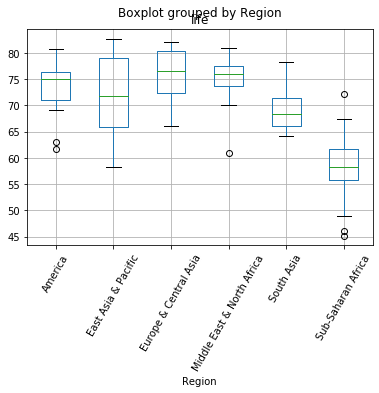

In [5]:
# Create a boxplot of life expectancy per region
import matplotlib.pyplot as plt
df.boxplot('life', 'Region', rot=60)
# Show the plot
plt.show()

- By observing above graph answer below questions
    - Question 1: Which is the best place to live?
        - East Asia and Pacific
    - Question 2: Which is not right place to live?
        - Sub Saharan Africa 

# <span style = "color:red"> Exercise 2: Creating dummy variables</span>

In [7]:
# Observe help document 
#pd.get_dummies?

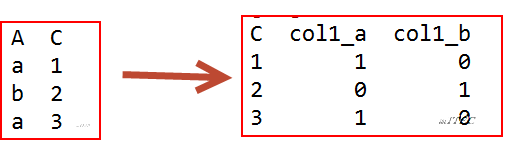

In [6]:
import pandas as pd
df1 = pd.DataFrame({'String_Column': ['a', 'b', 'c','d'],
                    'Numeric_Column': [1, 2, 3,4]})
df1



,String_Column,Numeric_Column
0,a,1
1,b,2
2,c,3
3,d,4


In [7]:
pd.get_dummies(df1, prefix='col1')

,Numeric_Column,col1_a,col1_b,col1_c,col1_d
0,1,1,0,0,0
1,2,0,1,0,0
2,3,0,0,1,0
3,4,0,0,0,1


In [6]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)
# Print the columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


In [7]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [8]:
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,0,1,0,0,0,0


In [9]:
# Drop 'Region_America' from df_region
df_region = pd.get_dummies(df, drop_first=True)
# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


- It is similar to `one hot encoding` of `sklearn` ML package and `to_categarical` of `keras` DL package.
- [Explore more](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)


# <span style = "color:red"> Exercise 3: 32.1.4.3.	Regression with categorical features using *ridge* algorithm</span>

In [11]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
y = df_region['life'].values
type(y)
X = (df_region[df_region.columns[[0,1,2,3,4,5,6,8,9,10,11,12,13]]].values)
type(X)
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)
# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)
# Print the cross-validated scores
print(ridge_cv)


[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from keras.utils import to_categorical

In [ ]:
OneHotEncoder =get_dummies = to_caegorical